# Principal components

## Procedure

Principal components can be calculated from the eigen vectors of the covariance matrix. The covariance matrix of the random variables $[X_1, X_2, ..., X_n]$, is
$$ \text{cov(X, X)} = \begin{bmatrix}E[(X_1-\mu_{X_1})(X_1-\mu_{X_1})] & E[(X_1-\mu_{X_1})(X_2-\mu_{X_2})] & \cdots & E[(X_1-\mu_{X_1})(X_n-\mu_{X_n})] \\ E[(X_2-\mu_{X_2})(X_1-\mu_{X_1})] & E[(X_2-\mu_{X_2})(X_2-\mu_{X_2})] & \cdots & E[(X_2-\mu_{X_2})(X_n-\mu_{X_n})] \\ \vdots \\ E[(X_n-\mu_{X_n})(X_1-\mu_{X_1})] & E[(X_n-\mu_{X_n})(X_2-\mu_{X_2})] & \cdots & E[(X_n-\mu_{X_n})(X_n-\mu_{X_n})]\end{bmatrix}$$
where $\mu_{X_n} = E(X_n)$ is the expectation value of $X_n$

In this example, only a two random variable ($[X_1, X_2]$) will be used. The eigen vectors and eigen values, $\boldsymbol{v}$ and $\lambda$ (from $\text{cov(X, X)}\boldsymbol{v} = \lambda \boldsymbol{v}$) determines the directions and length, respectively, of the principal components.



## Example

In this example, 2 random variable are generated (`array`), each with sample size 100. A center point, length and direction is calculated, based on this dataset. 

The `evaluator` is a iterator that calculates all available components. 

In [1]:
import numpy as np
from matplotlib import pyplot as pl
from explorer_util.visualization import plot_lin_eq
from pycomponents import component

NUMBER_OF_SAMPLES = 100
PROPORTIONALITY_CONSTANT = 3
xvalues = np.linspace(0, 1, NUMBER_OF_SAMPLES)
yvalues = [np.random.normal(0.5, 0.15, 1)[0] - 0.25 * x for x in xvalues]
example_array = np.array([xvalues, yvalues])
array = example_array.T
evaluator = component.ComponentEvaluator(array)
component_1 = next(evaluator)
component_2 = next(evaluator)

The parameters for the 2 resulting components are: 

In [2]:
component_1

center: [0.5        0.35753355], length: 0.30811477227932793, direction: [ 0.93770469 -0.34743332]

In [3]:
component_2

center: [0.5        0.35753355], length: 0.14101778214825966, direction: [0.34743332 0.93770469]

A plot of the variables along with the components:

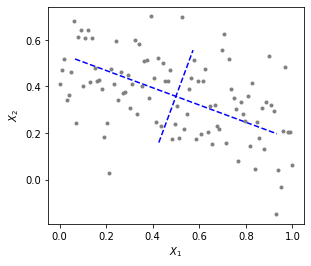

In [4]:
component_1.length = component_1.length * PROPORTIONALITY_CONSTANT
component_2.length = component_2.length * PROPORTIONALITY_CONSTANT
fig,axes = plot_lin_eq(array.T, [component_1, component_2])